<a href="https://colab.research.google.com/github/ryuuunothuman/PCVK_Ganjil_2024/blob/master/Week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Praktikum Filter

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


*Import Library*

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im

### Konvolusi tanpa Library

In [3]:
def convolution2d(image, kernel, stride, padding):
  # Tambahkan padding ke gambar
  padded_image = np.pad(image, ((padding, padding), (padding, padding)), mode='constant')

  # Tentukan ukuran output berdasarkan stride dan kernel
  output_height = (padded_image.shape[0] - kernel.shape[0]) // stride + 1
  output_width = (padded_image.shape[1] - kernel.shape[1]) // stride + 1

  # Buat matriks kosong untuk menampung hasil konvolusi
  output = np.zeros((output_height, output_width))

  # Lakukan operasi konvolusi
  for i in range(0, output_height):
    for j in range(0, output_width):
      # Tentukan wilayah
      region = padded_image[i*stride:i*stride+kernel.shape[0], j*stride:j*stride+kernel.shape[1]]
      # Hitung hasil
      output[i, j] = np.sum(region * kernel)

  return output.astype(np.float32) / 255

Text(0.5, 1.0, 'Sharpen')

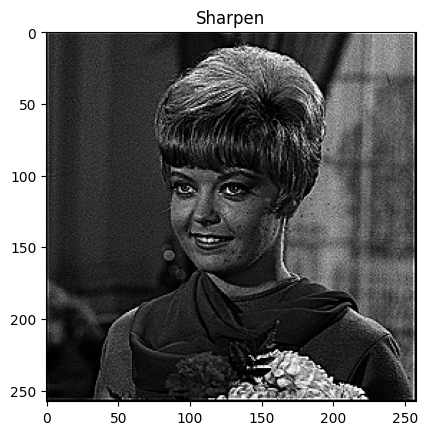

In [4]:
# Load citra yang akan diproses dan ubah menjadi citra keabuan
img = cv.imread('/content/drive/MyDrive/images/female.tiff')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# image sharpen
kernel_sharpen = np.array([
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]
])

result = convolution2d(img_gray, kernel_sharpen, 1, 2)

plt.imshow(cv.cvtColor(result, cv.COLOR_GRAY2RGB))
plt.title('Sharpen')

*Kernel Emboss*

Text(0.5, 1.0, 'Emboss')

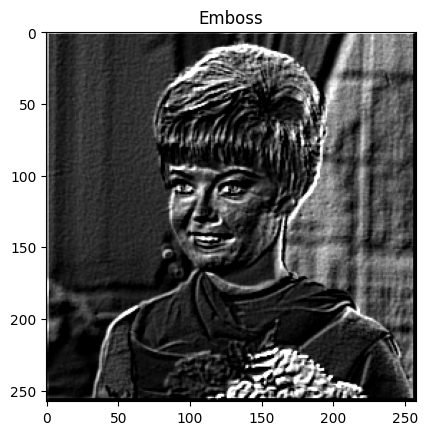

In [5]:
kernel_emboss = np.array([
    [-2, -1, 0],
    [-1, 1, 1],
    [0, 1, 2]
])

result = convolution2d(img_gray, kernel_emboss, 1, 2)

plt.imshow(cv.cvtColor(result, cv.COLOR_GRAY2RGB))
plt.title('Emboss')

*Left Sobel Edge Detection*

Text(0.5, 1.0, 'Left Sobel Edge Detection')

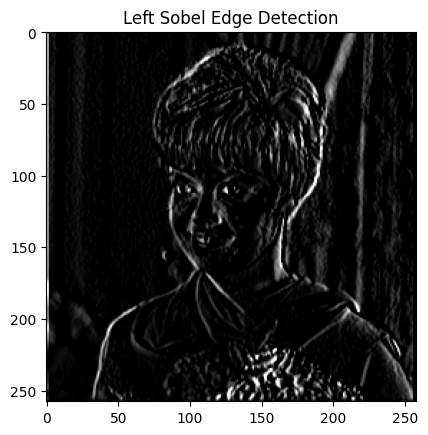

In [6]:
kernel_sobel = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])

result = convolution2d(img_gray, kernel_sobel, 1, 2)

plt.imshow(cv.cvtColor(result, cv.COLOR_GRAY2RGB))
plt.title('Left Sobel Edge Detection')

*Canny Edge Detection*

Text(0.5, 1.0, 'Canny Edge Detection')

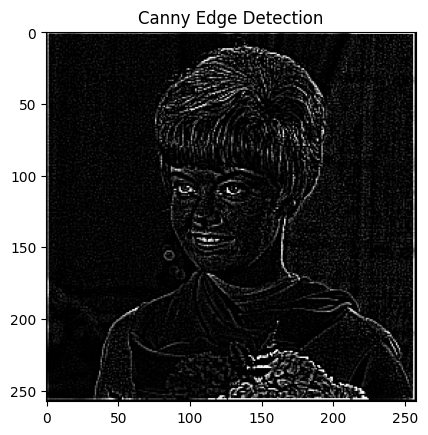

In [7]:
kernel_canny = np.array([
    [-1, -1, -1],
    [-1, 8, -1],
    [-1, -1, -1]
])

result = convolution2d(img_gray, kernel_canny, 1, 2)

plt.imshow(cv.cvtColor(result, cv.COLOR_GRAY2RGB))
plt.title('Canny Edge Detection')

*Prewitt Edge Detection*

Text(0.5, 1.0, 'Prewitt Edge Detection')

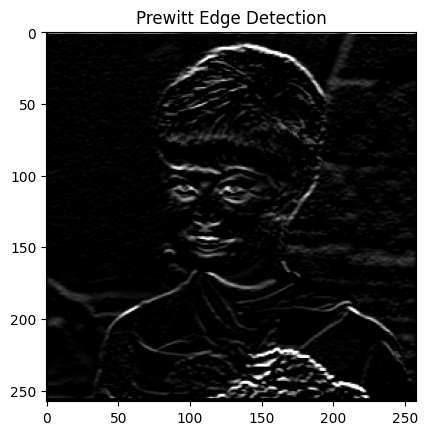

In [8]:
kernel_prewitt = np.array([
    [-1, -1, -1],
    [0, 0, 0],
    [1, 1, 1]
])

result = convolution2d(img_gray, kernel_prewitt, 1, 2)

plt.imshow(cv.cvtColor(result, cv.COLOR_GRAY2RGB))
plt.title('Prewitt Edge Detection')

*5x5 Gaussian Blur*

Text(0.5, 1.0, '5x5 Gaussian Blur')

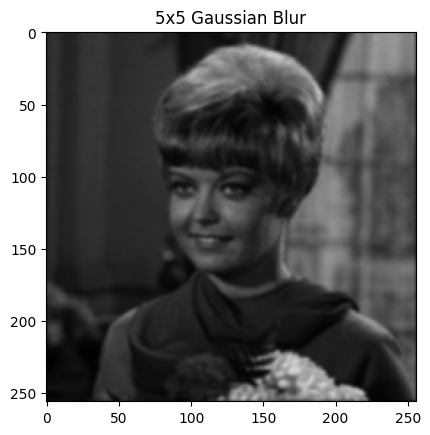

In [9]:
kernel_gaussian = np.array([
    [1, 4, 6, 4, 1],
    [4, 16, 24, 16, 4],
    [6, 24, 36, 24, 6],
    [4, 16, 24, 16, 4],
    [1, 4, 6, 4, 1]
]) * (1 / 256)

result = convolution2d(img_gray, kernel_gaussian, 1, 2)

plt.imshow(cv.cvtColor(result, cv.COLOR_GRAY2RGB))
plt.title('5x5 Gaussian Blur')

*21x21 Gaussian Blur*

Text(0.5, 1.0, '21x21 Gaussian Blur')

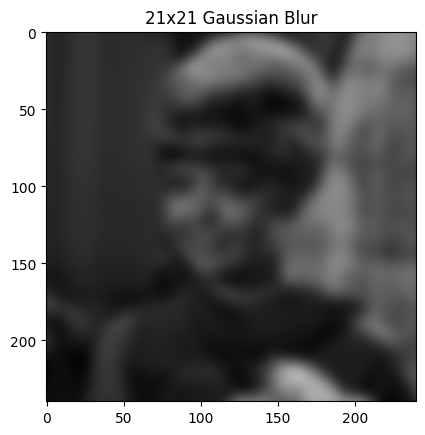

In [10]:
kernel_size = 21

sigma = math.sqrt(kernel_size)
gaussian_kernel = cv.getGaussianKernel(kernel_size, sigma)
gauss_kernel = gaussian_kernel @ gaussian_kernel.transpose()

result = convolution2d(img_gray, gauss_kernel, 1, 2)

plt.imshow(cv.cvtColor(result, cv.COLOR_GRAY2RGB))
plt.title('21x21 Gaussian Blur')